### checking depth argument with off axis projections (and gridded data)

Integrating the `('index', 'ones')` field should yield the 

In [116]:
import yt 
import numpy as np 
import matplotlib.pyplot as plt 
from yt.testing import fake_amr_ds
import os 

yt.set_log_level(50)
saveoutputs = False 

if saveoutputs:
    output_dir = 'offaxis_frb_images'
    if os.path.isdir(output_dir) is False:
        os.mkdir(output_dir)



ds = fake_amr_ds()

frbs = [] 

diag_dist = np.linalg.norm(ds.domain_width.in_units("code_length"))

n = [1., 1., 1.] # normal vec
c = ds.domain_left_edge


depths = np.geomspace(.1, 20., 50)
# depths = np.linspace(.1, diag_dist * 2.5, 10)

field = ('index', 'ones')
for idepth, depth in enumerate(depths):
    p = yt.OffAxisProjectionPlot(ds, n, field, 
                                 depth = depth,  
                                 weight_field=None, 
                                 center=c, 
                                 width = diag_dist, buff_size=(400,400))
    if saveoutputs:
        p.set_log(field, False)
        p.save(os.path.join(output_dir, f"depth_{str(idepth).zfill(3)}.png"))
    frbs.append(p.frb[field])
    
diff_from_0 = [np.abs(im - frbs[0]) for im in frbs]
max_diffs = [diff.max() for diff in diff_from_0]
sums = np.array([im.sum() for im in frbs])
maxvals = np.array([im.max() for im in frbs])

the max value should hit the full diagnoal distance once it's covered:

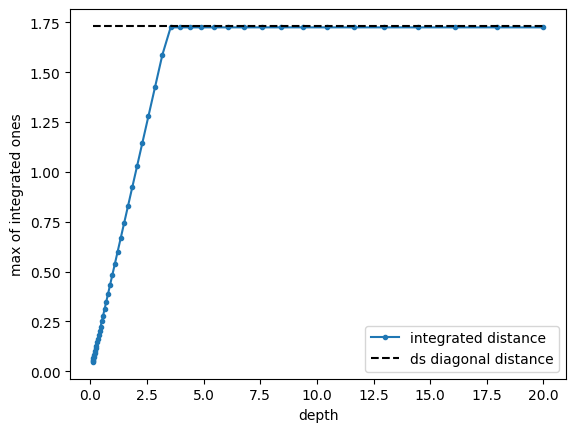

In [117]:
plt.plot(depths, maxvals, marker='.',label='integrated distance')
plt.plot([depths[0], depths[-1]], [diag_dist, diag_dist], '--k', label ='ds diagonal distance')
plt.xlabel('depth')
plt.ylabel('max of integrated ones')
plt.legend()

Note that the `depth` argument, however, is on either side of the center point, so it scales here by depth/2:

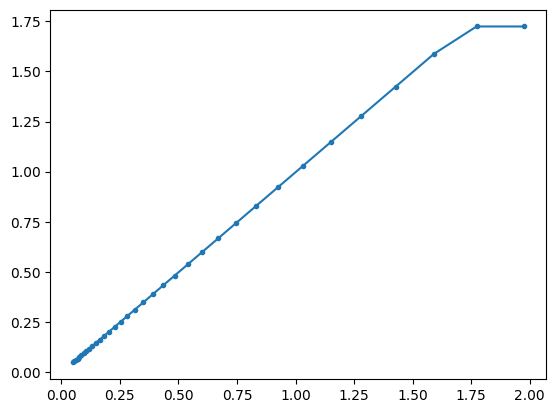

In [118]:
plt.plot(depths[:35]/2, maxvals[:35] ,marker='.')

In [97]:
depths/2, maxvals

(array([ 0.05      ,  0.05570957,  0.06207112,  0.06915911,  0.07705648,
         0.08585567,  0.09565965,  0.10658316,  0.11875403,  0.13231472,
         0.14742392,  0.16425846,  0.18301537,  0.20391414,  0.22719938,
         0.25314359,  0.28205041,  0.31425814,  0.35014371,  0.39012711,
         0.43467626,  0.48431254,  0.53961686,  0.60123646,  0.66989248,
         0.74638843,  0.83161956,  0.92658335,  1.03239118,  1.15028136,
         1.28163358,  1.4279851 ,  1.59104869,  1.77273274,  1.97516355,
         2.20071021,  2.45201236,  2.73201104,  3.04398316,  3.39157981,
         3.77886901,  4.21038329,  4.69117279,  5.2268643 ,  5.82372717,
         6.48874664,  7.2297056 ,  8.05527568,  8.97511876, 10.        ]),
 array([0.04846715, 0.05417672, 0.06053827, 0.06762626, 0.07552364,
        0.08432282, 0.0941268 , 0.10505031, 0.11722119, 0.13078187,
        0.14589108, 0.16272562, 0.18148252, 0.2023813 , 0.22566653,
        0.25161075, 0.28051756, 0.31272529, 0.34861086, 0.388594

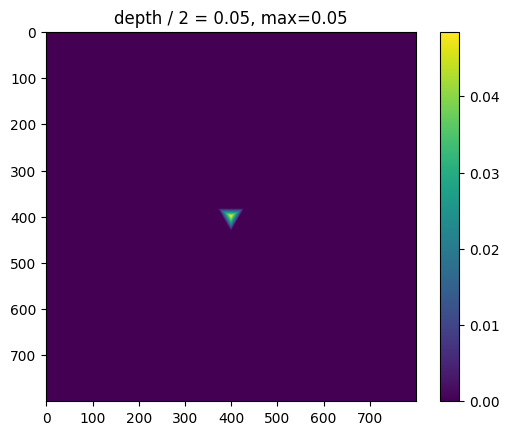

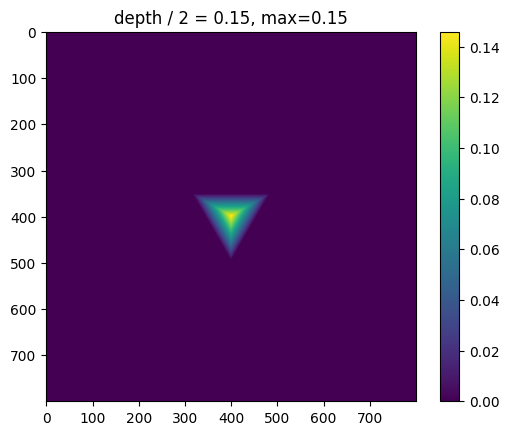

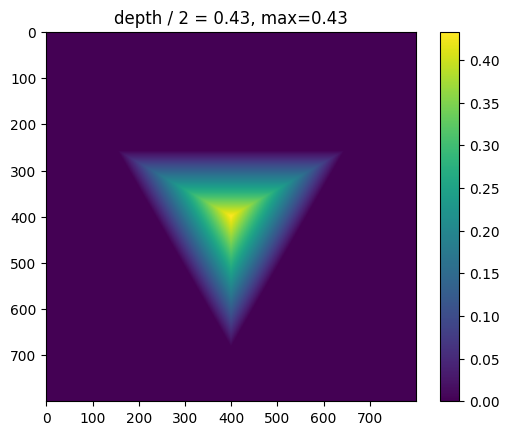

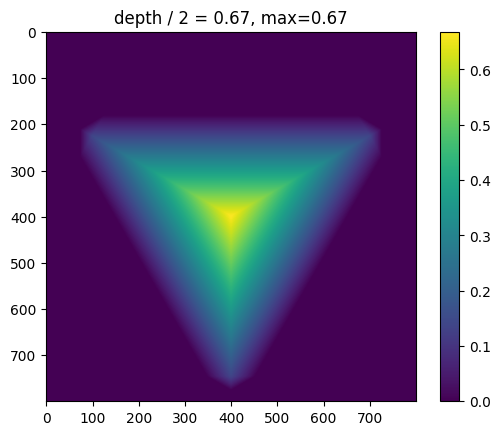

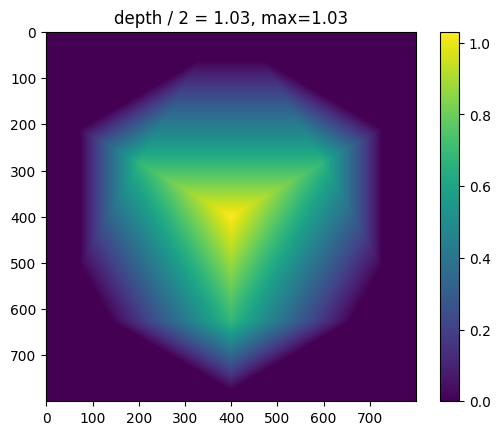

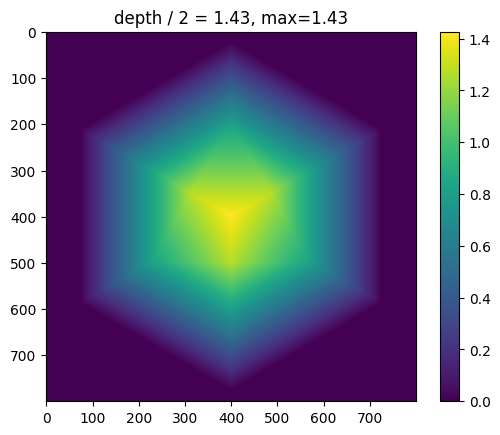

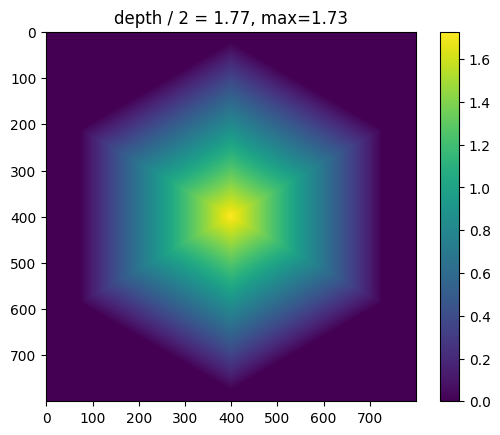

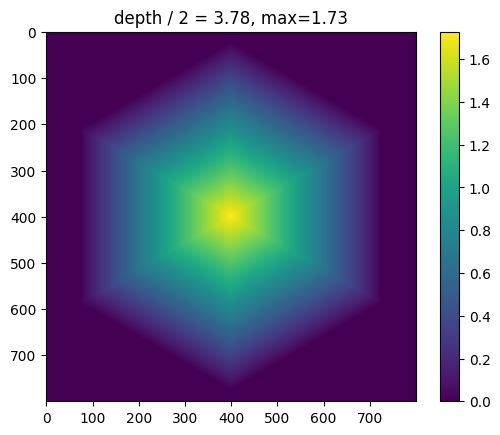

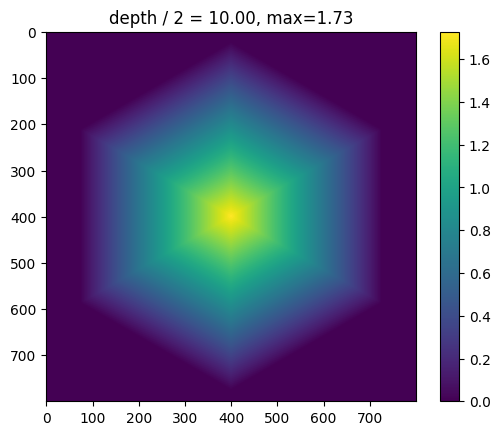

In [86]:
for indexval in [0, 10, 20, 24, 28, 31, 33, 40, 49]:
    plt.figure()
    plt.imshow(frbs[indexval])
    maxval = maxvals[indexval]
    plt.title(f"depth / 2 = {depths[indexval]/2:.2f}, max={maxval:.2f}")
    plt.colorbar()